In [535]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import kstest

%matplotlib inline

In [23]:
data = pd.read_csv("../resar1.csv")
n = len(data)
data.x.head(15)

0     0.000000
1    -3.533974
2    -5.808323
3    -5.872785
4    -5.064234
5    -2.912264
6     1.221938
7    -0.674790
8     0.339038
9     1.186400
10    0.494950
11    1.221269
12   -0.683340
13    0.560748
14    0.629820
Name: x, dtype: float64

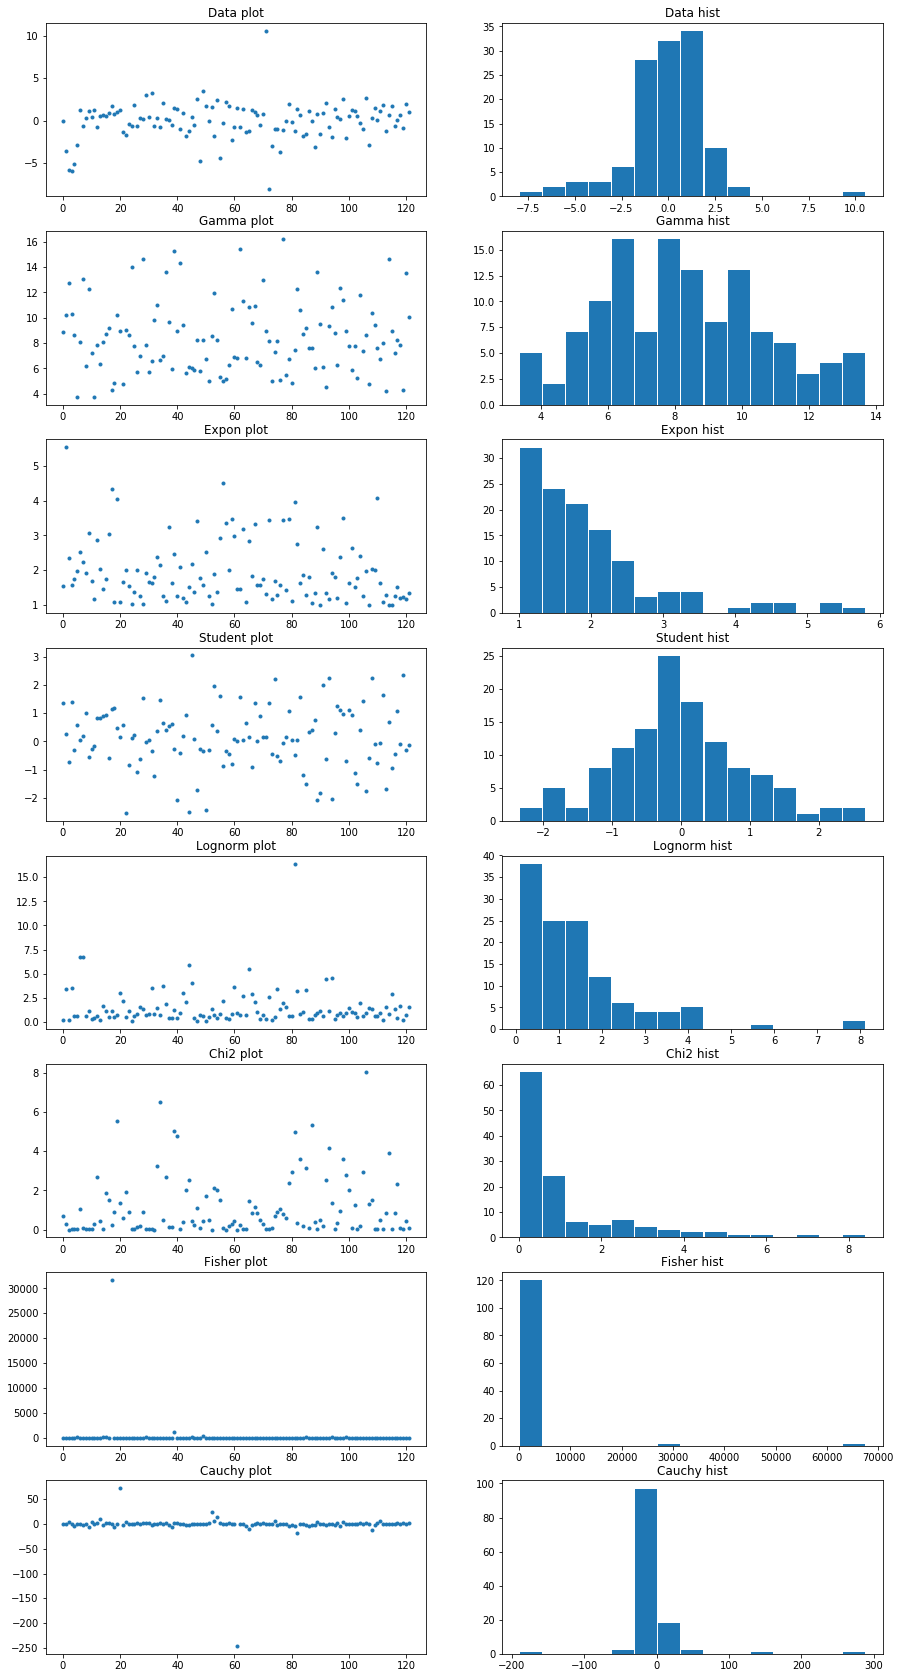

In [24]:
fig = plt.figure(figsize=(15,30))

bin_num = 15
width = 0.95

ax1 = fig.add_subplot(8,2,1)
ax1.plot(data.x, '.')
ax1.set_title('Data plot')

ax2 = fig.add_subplot(8,2,2)
ax2.hist(data.x, bins=bin_num, rwidth=width);
ax2.set_title('Data hist')

ax3 = fig.add_subplot(8,2,3)
ax3.plot(stats.gamma.rvs(7.5, 1, size=n), '.')
ax3.set_title('Gamma plot')

ax4 = fig.add_subplot(8,2,4)
ax4.hist(stats.gamma.rvs(7.5, 1, size=n), bins=bin_num, rwidth=width)
ax4.set_title('Gamma hist')

ax5 = fig.add_subplot(8,2,5)
ax5.plot(stats.expon.rvs(1, size=n), '.')
ax5.set_title('Expon plot')

ax6 = fig.add_subplot(8,2,6)
ax6.hist(stats.expon.rvs(1, size=n), bins=bin_num, rwidth=width)
ax6.set_title('Expon hist')

ax7 = fig.add_subplot(8,2,7)
ax7.plot(stats.t.rvs(100, size=n), '.')
ax7.set_title('Student plot')

ax8 = fig.add_subplot(8,2,8)
ax8.hist(stats.t.rvs(100, size=n), bins=bin_num, rwidth=width)
ax8.set_title('Student hist')

ax9 = fig.add_subplot(8,2,9)
ax9.plot(stats.lognorm.rvs(1, size=n), '.')
ax9.set_title('Lognorm plot')

ax10 = fig.add_subplot(8,2,10)
ax10.hist(stats.lognorm.rvs(1, size=n), bins=bin_num, rwidth=width)
ax10.set_title('Lognorm hist')

ax11 = fig.add_subplot(8,2,11)
ax11.plot(stats.chi2.rvs(1, size=n), '.')
ax11.set_title('Chi2 plot')

ax12 = fig.add_subplot(8,2,12)
ax12.hist(stats.chi2.rvs(1, size=n), bins=bin_num, rwidth=width)
ax12.set_title('Chi2 hist')

ax13 = fig.add_subplot(8,2,13)
ax13.plot(stats.f.rvs(1, 1, size=n), '.')
ax13.set_title('Fisher plot')

ax14 = fig.add_subplot(8,2,14)
ax14.hist(stats.f.rvs(1, 1, size=n), bins=bin_num, rwidth=width)
ax14.set_title('Fisher hist')

axbin_num = fig.add_subplot(8,2,bin_num)
axbin_num.plot(stats.cauchy.rvs(size=n), '.')
axbin_num.set_title('Cauchy plot')

ax16 = fig.add_subplot(8,2,16)
ax16.hist(stats.cauchy.rvs(size=n), bins=bin_num, rwidth=width)
ax16.set_title('Cauchy hist')

plt.show();

# Normal

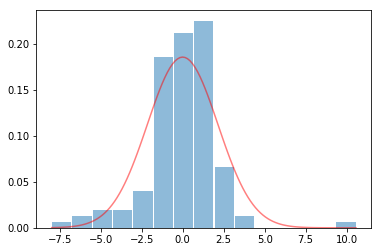

In [34]:
p_fitted = stats.norm.fit(data.x)
x_fitted = np.linspace(data.x.min(), data.x.max(), n)
y_fitted = stats.norm.pdf(x_fitted, p_fitted[0], p_fitted[1])
plt.plot(x_fitted, y_fitted, 'r', alpha = 0.5);
plt.hist(data.x, bins=bin_num, rwidth=width, alpha=0.5, density=True);

In [39]:
params = stats.norm.fit(data.x)
kstest(data.x, 'norm', params)

KstestResult(statistic=0.0996586794177525, pvalue=0.1656719131200417)

In [40]:
params

(1.1323698708471104e-05, 2.1485718698311027)

# Student

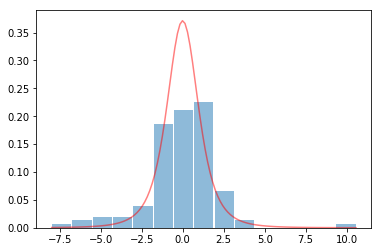

In [25]:
p_fitted = stats.t.fit(data.x)
x_fitted = np.linspace(data.x.min(), data.x.max(), n)
y_fitted = stats.t.pdf(x_fitted, p_fitted[0], p_fitted[1])
plt.plot(x_fitted, y_fitted, 'r', alpha = 0.5);
plt.hist(data.x, bins=bin_num, rwidth=width, alpha=0.5, density=True);

In [26]:
p_fitted

(3.4257103197898395, -8.731307922811806e-06, 1.414451776941795)

# Cauchy

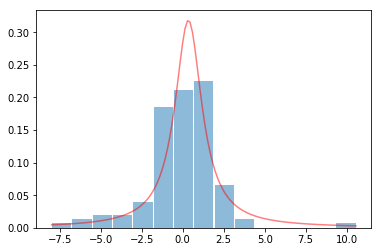

In [27]:
p_fitted = stats.cauchy.fit(data.x)
x_fitted = np.linspace(data.x.min(), data.x.max(), n)
y_fitted = stats.cauchy.pdf(x_fitted, p_fitted[0], p_fitted[1])
plt.plot(x_fitted, y_fitted, 'r', alpha = 0.5);
plt.hist(data.x, bins=bin_num, rwidth=width, alpha=0.5, density=True);

# try student

In [527]:
from sklearn.model_selection import train_test_split
train_test_ratio = 0.4
test_size = int(n * train_test_ratio)
train_size = int(n - test_size)
train, test = train_test_split(data.x, test_size=train_test_ratio, shuffle=True)

### fitting params using MLE

In [528]:
params = stats.t.fit(train)

### plotting train

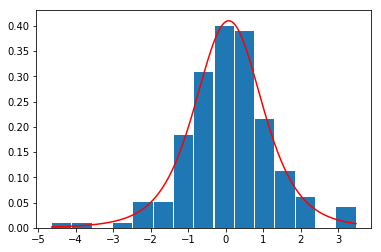

In [531]:
x_train = np.linspace(train.min(), train.max(), train_size)
y_train = stats.t.pdf(x_train, *params)
plt.plot(x_train, y_train, 'r');
plt.hist(train, bins=15, rwidth=width, density=True);

### plotting test

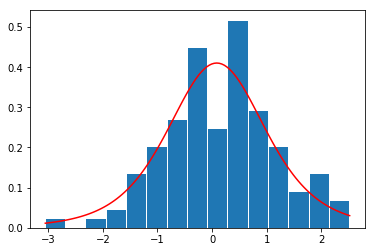

In [532]:
x_test = np.linspace(test.min(), test.max(), test_size)
y_test = stats.t.pdf(x_test, *params)
plt.plot(x_test, y_test, 'r');
h = plt.hist(test, bins=bin_num, rwidth=width, density=True);

### plot full sample

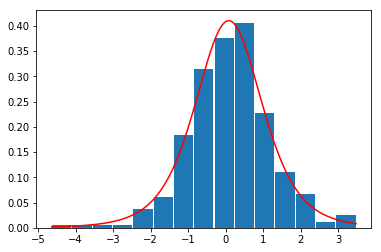

In [533]:
x_full = np.linspace(data.x.min(), data.x.max(), n)
y_full = stats.t.pdf(x_full, *params)
plt.hist(data.x, bins=bin_num, rwidth=width, density=True)
plt.plot(x_full, y_full, 'r');

### Kolmogorov-Smirnov on test sample

In [534]:
kstest(test, 't', params)

KstestResult(statistic=0.06996580960749033, pvalue=0.590094548126278)